<h1 align='center'>Instagram Reach Analysis using Python</h1>

### Necessary Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import warnings as warnings
warnings.filterwarnings('ignore')

## EDA 

In [2]:
data = pd.read_csv("data.csv", encoding = 'latin1')

In [3]:
data.shape

(119, 15)

In [4]:
data.head()

Unnamed: 0.1  Unnamed: 0  Impressions  From Home  From Hashtags  \
0             0           0         3920       2586           1028   
1             1           1         5394       2727           1838   
2             2           2         4021       2085           1188   
3             3           3         4528       2700            621   
4             4           4         2518       1704            255   

   From Explore  From Other  Saves  Comments  Shares  Likes  Profile Visits  \
0           619          56     98         9       5    162              35   
1          1174          78    194         7      14    224              48   
2             0         533     41        11       1    131              62   
3           932          73    172        10       7    213              23   
4           279          37     96         5       4    123               8   

   Follows                                            Caption  \
0        2  Here are some of the most important data visua...   
1       10  Here are some of the best data science project...   
2       12  Learn how to train a machine learning model an...   
3        8  HereÃÂs how you can write a Python program t...   
4        0  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #financeÃÂ #moneyÃÂ #businessÃÂ #investingÃ...  
1  #healthcareÃÂ #healthÃÂ #covidÃÂ #dataÃÂ #...  
2  #dataÃÂ #datascienceÃÂ #dataanalysisÃÂ #dat...  
3  #pythonÃÂ #pythonprogrammingÃÂ #pythonprojec...  
4  #datavisualizationÃÂ #datascienceÃÂ #dataÃÂ...

In [5]:
data.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    119 non-null    int64 
 1   Unnamed: 0      119 non-null    int64 
 2   Impressions     119 non-null    int64 
 3   From Home       119 non-null    int64 
 4   From Hashtags   119 non-null    int64 
 5   From Explore    119 non-null    int64 
 6   From Other      119 non-null    int64 
 7   Saves           119 non-null    int64 
 8   Comments        119 non-null    int64 
 9   Shares          119 non-null    int64 
 10  Likes           119 non-null    int64 
 11  Profile Visits  119 non-null    int64 
 12  Follows         119 non-null    int64 
 13  Caption         119 non-null    object
 14  Hashtags        119 non-null    object
dtypes: int64(13), object(2)
memory usage: 14.1+ KB


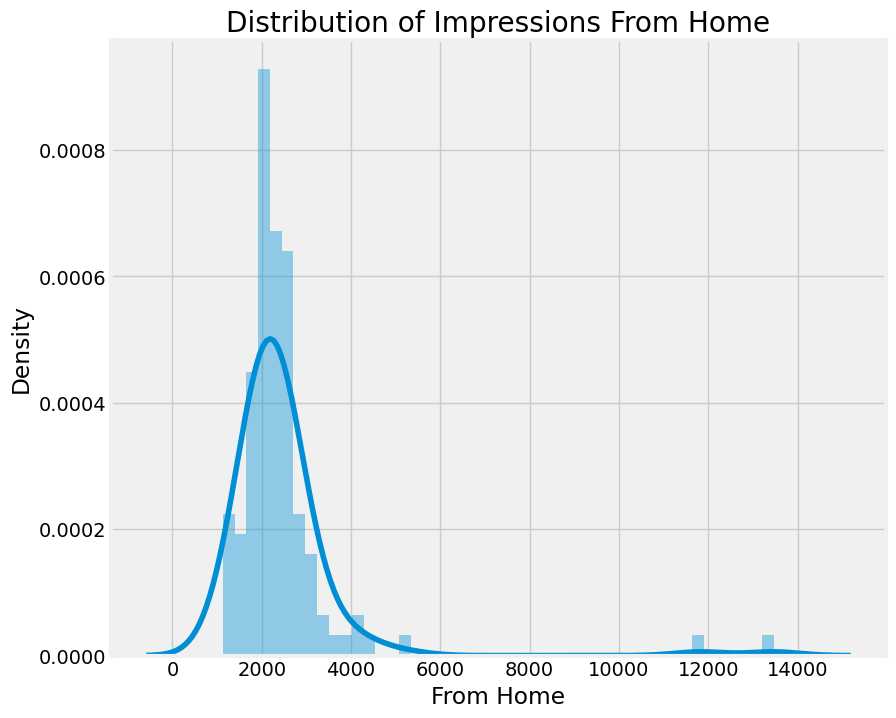

In [7]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

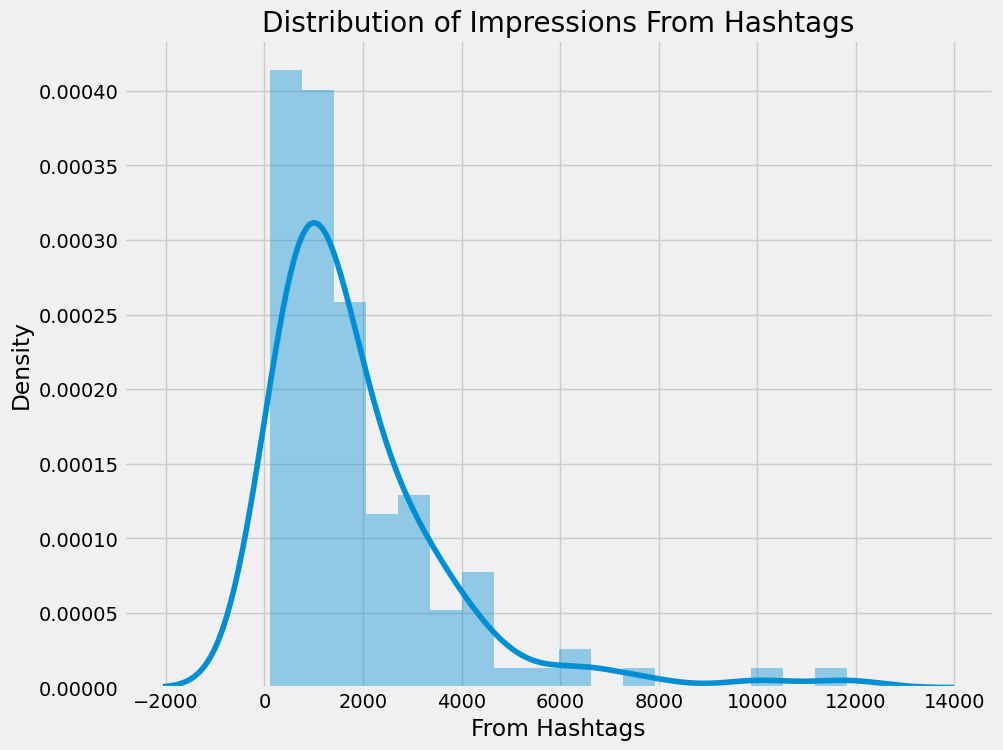

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

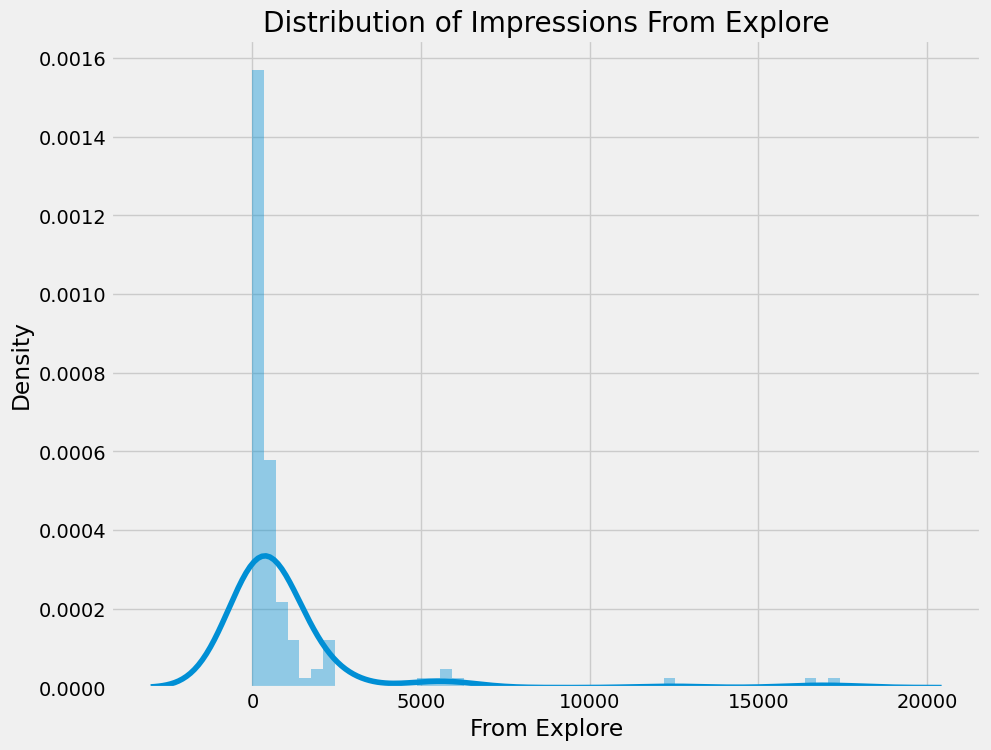

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [10]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home,hashtags,explore,other]

fig = px.pie(data,
             values=values,
             names=labels,
             title='Impressions on Instagram Posts From Various Sources',
             hole=0.5)
fig.show()

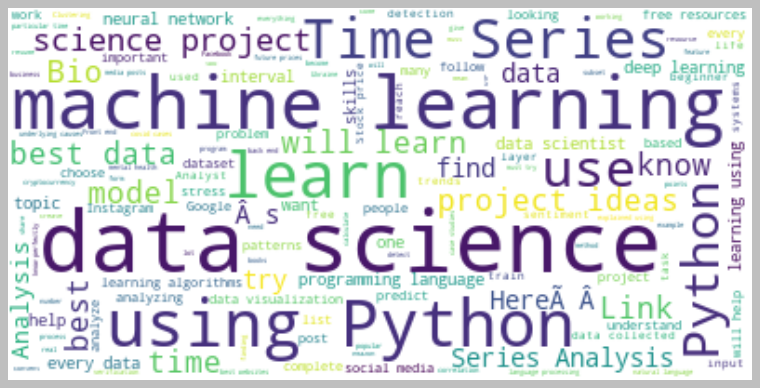

In [11]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

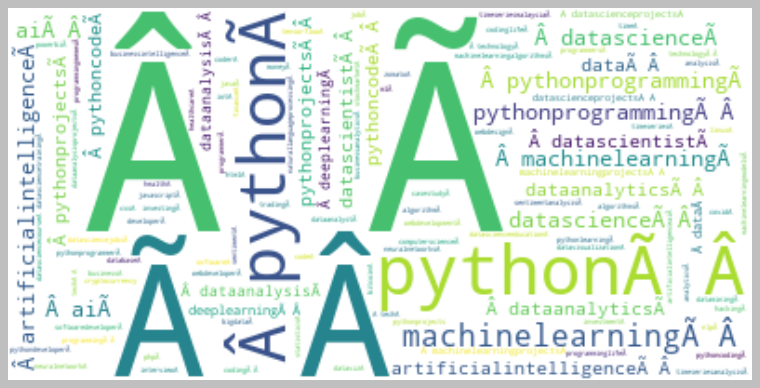

In [12]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
figure = px.scatter(data_frame = data,
                    x="Impressions",
                    y="Likes",
                    size="Likes",
                    trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [14]:
figure = px.scatter(data_frame = data,
                    x="Impressions",
                    y="Comments",
                    size="Comments",
                    trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [15]:
figure = px.scatter(data_frame = data,
                    x="Impressions",
                    y="Shares",
                    size="Shares",
                    trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [16]:
figure = px.scatter(data_frame = data,
                    x="Impressions",
                    y="Saves",
                    size="Saves",
                    trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [17]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Unnamed: 0.1      0.379437
Unnamed: 0        0.379437
Comments         -0.028524
Name: Impressions, dtype: float64


<AxesSubplot: >

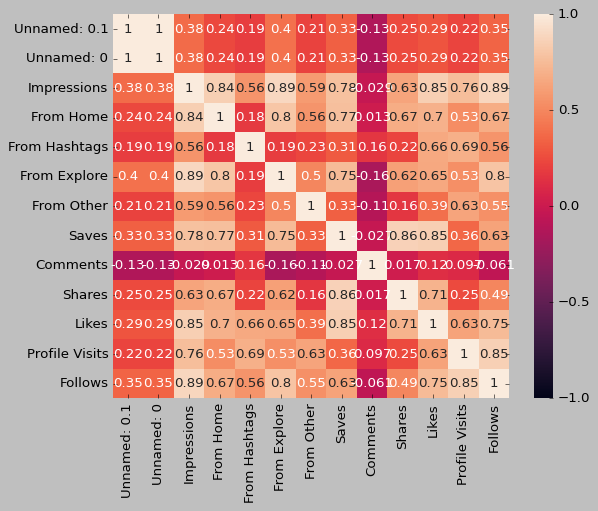

In [18]:
sns.heatmap(correlation,vmin=-1, vmax=1, annot=True)

In [19]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [20]:
figure = px.scatter(data_frame = data,
                    x="Profile Visits",
                    y="Follows",
                    size="Follows",
                    trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [21]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares','Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)

In [22]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.6502989041230327

In [23]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9078.58959397])